In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import time

from matplotlib import pyplot as plt
%matplotlib inline

import random

In [46]:
# Set the sample fraction
sample_frac = 0.1  # 0.1% of the data

# Define the skip_rows function
def skip_rows(index):
    return index > 0 and random.random() > sample_frac

# Use the skip_rows function with skiprows parameter
df = pd.read_csv('data/nyc_taxi_data_2014.csv', skiprows=skip_rows)

C:\Users\alber\AppData\Local\Temp\ipykernel_15896\2681031213.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/nyc_taxi_data_2014.csv', skiprows=skip_rows)


In [47]:
len(df)

1500313

In [48]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [62]:
# Drop NaN values
o_lng = df[['pickup_longitude']].rename(columns={"pickup_longitude": "lng"}).dropna()
o_lat = df[['pickup_latitude']].rename(columns={"pickup_latitude": "lat"}).dropna()
d_lng = df[['dropoff_longitude']].rename(columns={"dropoff_longitude": "lng"}).dropna()
d_lat = df[['dropoff_latitude']].rename(columns={"dropoff_latitude": "lat"}).dropna()
lng = pd.concat([o_lng, d_lng], axis=0)
lat = pd.concat([o_lat, d_lat], axis=0)

In [63]:
lng_lat = pd.concat([lng, lat], axis=1)
lng_lat

,lng,lat
0,-73.960213,40.770464
1,-73.865552,40.770480
2,-73.980816,40.764349
3,-74.005286,40.742399
4,-73.981957,40.771245
...,...,...
1500308,-73.984333,40.766755
1500309,-74.002970,40.717265
1500310,-73.951040,40.782887
1500311,-73.973077,40.752765


In [64]:
points = lng_lat.values

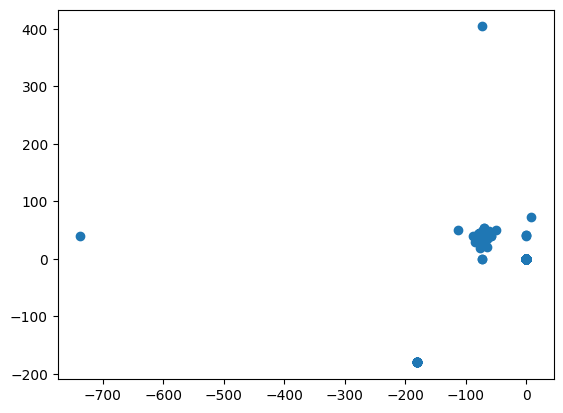

In [65]:
plt.scatter(points[:,0], points[:,1]) ### plot long against lat ###

In [66]:
km_model = KMeans(n_clusters=4) ### instantiate model ###

In [67]:
km_model.fit(points)

KMeans(n_clusters=4)

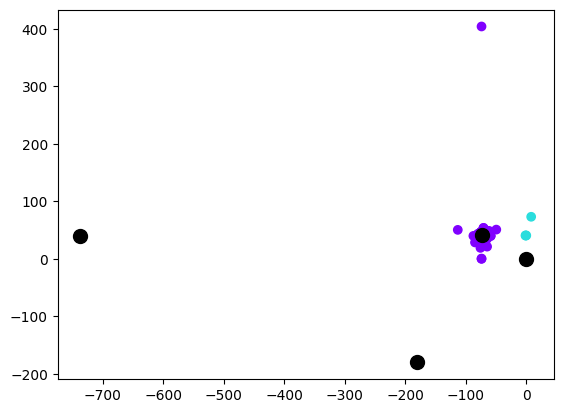

In [68]:
# print(km_model.cluster_centers_) ### 2 dim np arr ###
# km_model.labels_[0:50]
plt.scatter(points[:,0], points[:,1], c= km_model.labels_, cmap="rainbow") ### color code points assigned to diff labels ###

### print the centroids ###

plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], s=100, c="black")